<a href="https://colab.research.google.com/github/chinmay8bit/MachineLearningStuff/blob/main/Linear_transformations_visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear transformations visualized

I want to see what linear transformations actually do geometrically to a dataset. For visualisation purposes, I am going to take only 2 dimensional vectors which can be represented on a 2d plane.

I will assign colors to the points based on their original location in the plane. This is stored in the colors array.

In [105]:
import matplotlib.pyplot as plt
import torch

# Number of points
num_points = 10000

# Generating random coordinates between 0 and 100 for x and y
coordinates = torch.rand(num_points, 2) * 100

# Initializing the RGB color array (Red is always 0)
colors = torch.zeros(num_points, 3)  # RGB

# Normalize the coordinates to the range 0-255 for RGB
# Blue increases with x-coordinate, Green increases with y-coordinate
colors[:, 1] = (coordinates[:, 1] / 100) * 255  # Green for y
colors[:, 2] = (coordinates[:, 0] / 100) * 255  # Blue for x

# Normalize the color values to [0, 1] for matplotlib
normalized_colors = colors / 255

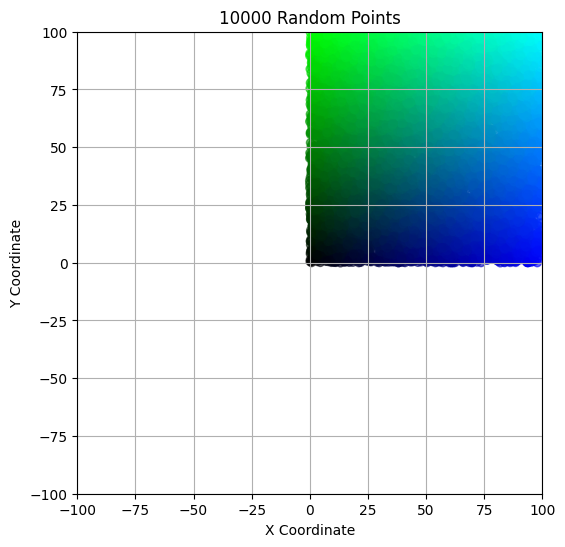

In [117]:
# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(coordinates[:, 0].numpy(), coordinates[:, 1].numpy(),
            color=normalized_colors.numpy(), alpha=0.6)

plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('10000 Random Points')
plt.grid(True)
plt.show()

This assigned color gradient will help us visualize the new posistions of the points after I apply a linear transformation. So, we can see what the linear layer actually does to the data.

In [121]:
# prompt: pytorch linear layer with 2 in and 2 out

linear_layer = torch.nn.Linear(in_features=2, out_features=2)
new_coordinates = linear_layer(coordinates)

max_value = torch.max(new_coordinates)
min_value = torch.min(new_coordinates)

print(max_value)
print(min_value)

tensor(44.4670, grad_fn=<MaxBackward1>)
tensor(-65.1791, grad_fn=<MinBackward1>)


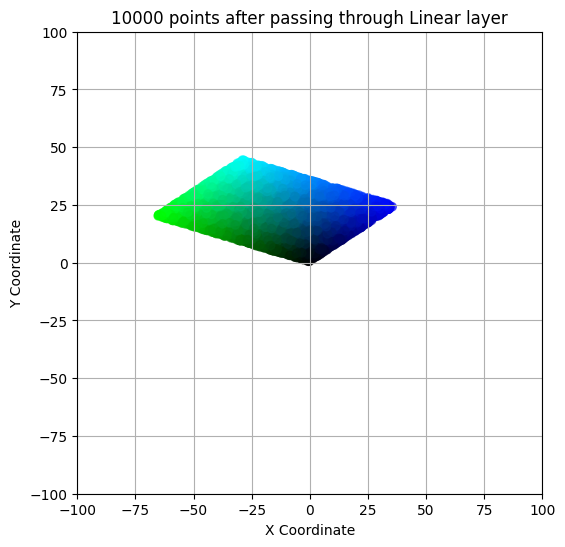

In [122]:
# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(new_coordinates[:, 0].detach().numpy(), new_coordinates[:, 1].detach().numpy(),
            color=normalized_colors.numpy(), alpha=0.6)

plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('10000 points after passing through Linear layer')
plt.grid(True)
plt.show()

We can see that the color gradient is maintained. So, the relative positions of the points does not change that much.

The points are sort of squashed along the y axis and rotated anti-clockwise.

Now, let's plot this side by side. We can run the following block of code as many times, to get new linear transformations.

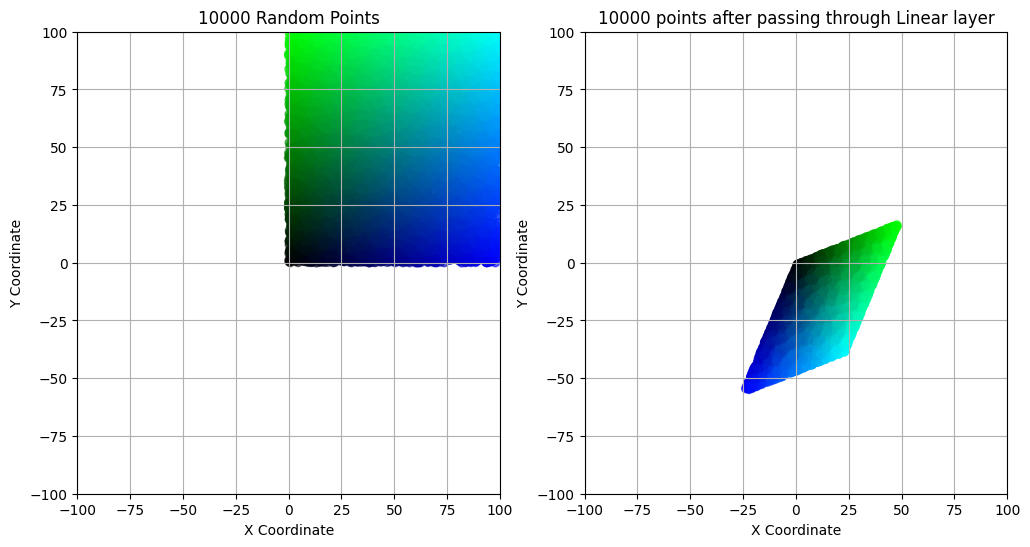

In [129]:
# prompt: pytorch linear layer with 2 in and 2 out

linear_layer = torch.nn.Linear(in_features=2, out_features=2)
new_coordinates = linear_layer(coordinates)

max_value = torch.max(new_coordinates)
min_value = torch.min(new_coordinates)

# print(max_value)
# print(min_value)


plt.figure(figsize=(12, 6))

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(coordinates[:, 0].numpy(), coordinates[:, 1].numpy(),
            color=normalized_colors.numpy(), alpha=0.6)

plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('10000 Random Points')
plt.grid(True)

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(new_coordinates[:, 0].detach().numpy(), new_coordinates[:, 1].detach().numpy(),
            color=normalized_colors.numpy(), alpha=0.6)

plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('10000 points after passing through Linear layer')
plt.grid(True)

plt.show()